# Hacktiv8-PTP Python For Data Science // S.8.1 // Advanced Visualization



data: https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt

## Exploring Datasets with pandas and Matplotlib

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

mpl.style.use('fivethirtyeight')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.2


In [2]:
df_can = pd.read_excel('/Users/raraditapurnamareta/H8_004/Sesi_8/Data/Canada.xlsx', sheet_name = 'Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

print('Dataset successfully read')

Dataset successfully read


In [3]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [4]:
print(df_can.shape)

(195, 43)


In [5]:
# clean up the dataset to remove unnecessary columns

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1,
           inplace=True)

In [6]:
# rename the columns

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent',
                      'RegName':'Region'}, inplace=True)

In [7]:
# for sake of consistency, let's also make all column labels of type string

df_can.columns = list(map(str, df_can.columns))

In [8]:
# set the country name as index - useful for quickly looking up countries using .loc method

df_can.set_index('Country', inplace = True)

In [9]:
df_can['Total'] = df_can.sum(axis=1)

/var/folders/lv/sc7txngx7sz18x_p67l6s_hw0000gn/T/ipykernel_13818/552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [10]:
# years that we will be using in this lesson - useful for plotting later on

years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


## Visualizing Data using Matplotlib

In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # for waffle charts


print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.2


### Waffle Charts
A waffle chart shows progress towards a target or a completion percentage. Waffle Charts are a great way of visualizing data in relation to a whole, to highlight progress against a given threshold, or when dealing with populations too varied for pie charts. A lot of times, these are used as an alternative to the pie charts.

In [12]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

In [13]:
# 1. Compute the proportion of each category with respect to the total

total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

#print out proportions

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [14]:
# 2. Define total size of waffle chart

width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [15]:
# 3. Use proportion of each category to define amount tiles of each category

tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [16]:
# 4. Make matrices and fill in

# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height,width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles
        if tile_index > sum(tiles_per_category[0:category_index]):
            # proceed to the next category
            category_index += 1
        # set the class value to an integer, which increases with class
        waffle_chart[row,col] = category_index

print('Waffle chart populated!')

Waffle chart populated!


In [17]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

<Figure size 640x480 with 0 Axes>

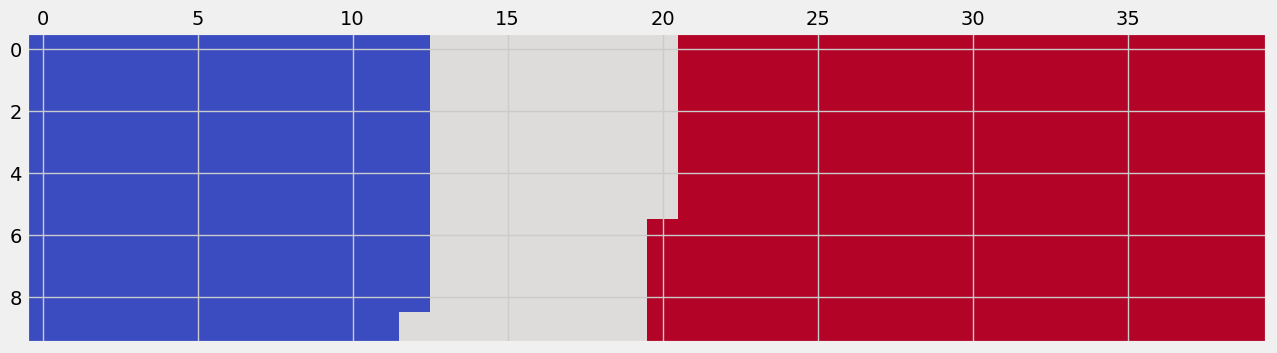

In [18]:
# 5. Visualize waffle matices to waffle chart

fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar

([], [])

<Figure size 640x480 with 0 Axes>

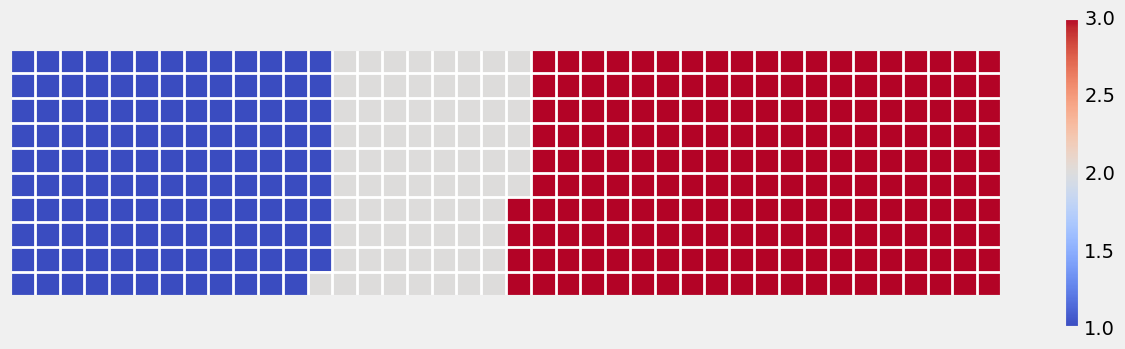

In [19]:
# 6. improve the chart

fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 640x480 with 0 Axes>

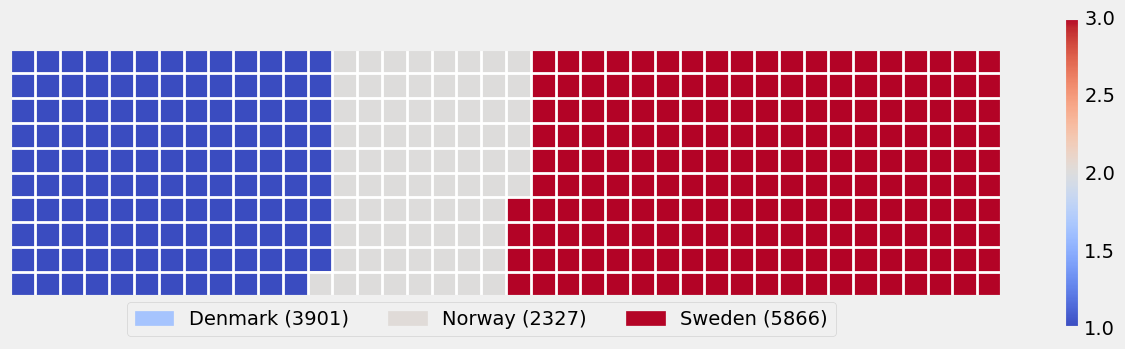

In [20]:
# 7. add legend

fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [21]:
# Summerize of waffle chart

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [22]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

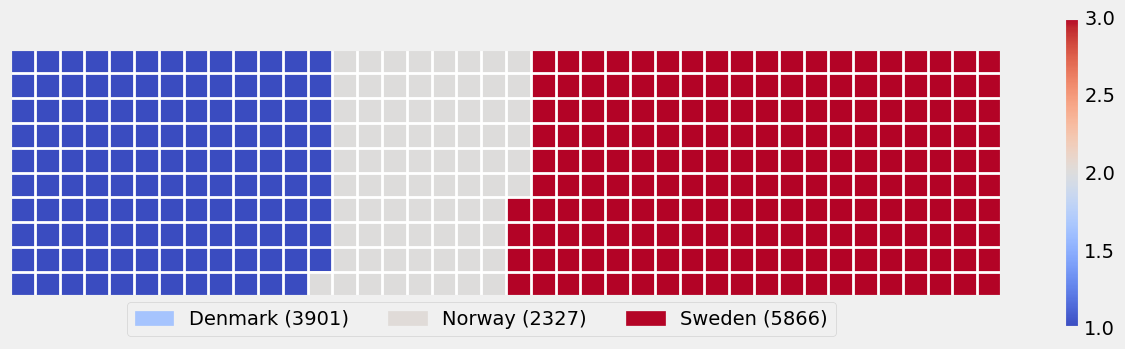

In [23]:
create_waffle_chart(categories, values, height, width, colormap)

### Word Clouds
Word cloud is an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.

In [24]:
# install package

!pip install wordcloud

In [25]:
# Import packages

from wordcloud import WordCloud, STOPWORDS

print('Word Cloud already imported!')

Word Cloud already imported!


In [26]:
# import dataset

alice_novel = open('/Users/raraditapurnamareta/H8_004/Sesi_8/Data/alice_novel.txt', 'r').read()

print('FILE DOWNLOADED AND SAVED!')

FILE DOWNLOADED AND SAVED!


In [27]:
stopwords = set(STOPWORDS)

In [28]:
# Word cloud contains the first 2000 words in novel

alice_wc = WordCloud(background_color='white',
                     max_words=2000, stopwords=stopwords)

# generate the word cloud

alice_wc.generate(alice_novel)

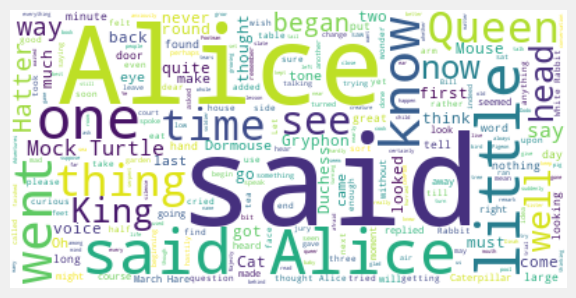

In [29]:
# Visualize the word cloud

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

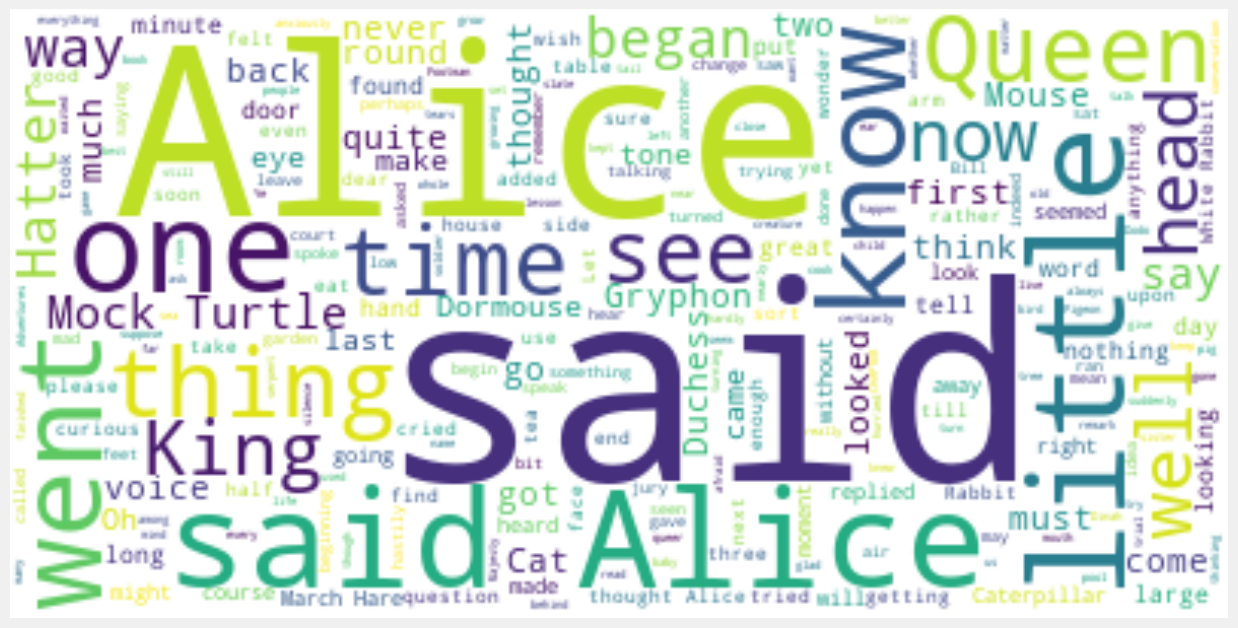

In [30]:
# maximize the fig size

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

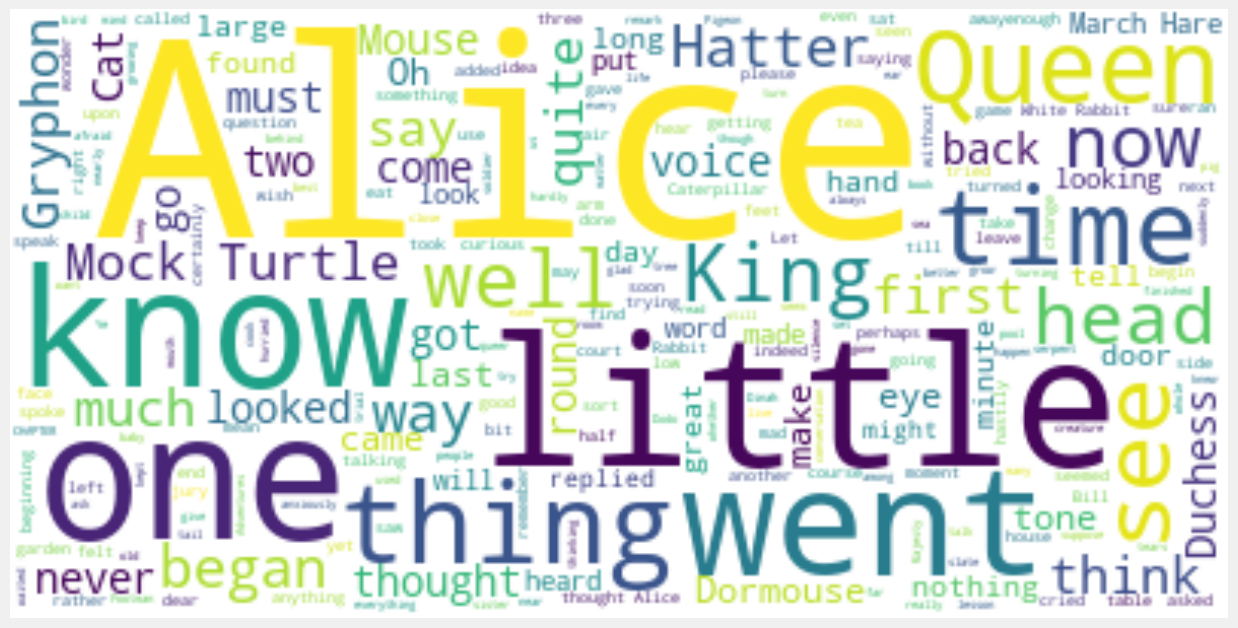

In [31]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Masking

In [32]:
alice_mask = np.array(Image.open('/Users/raraditapurnamareta/H8_004/Sesi_8/Data/alice_mask.png'))

In [33]:
alice_mask[400:501,400:501]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

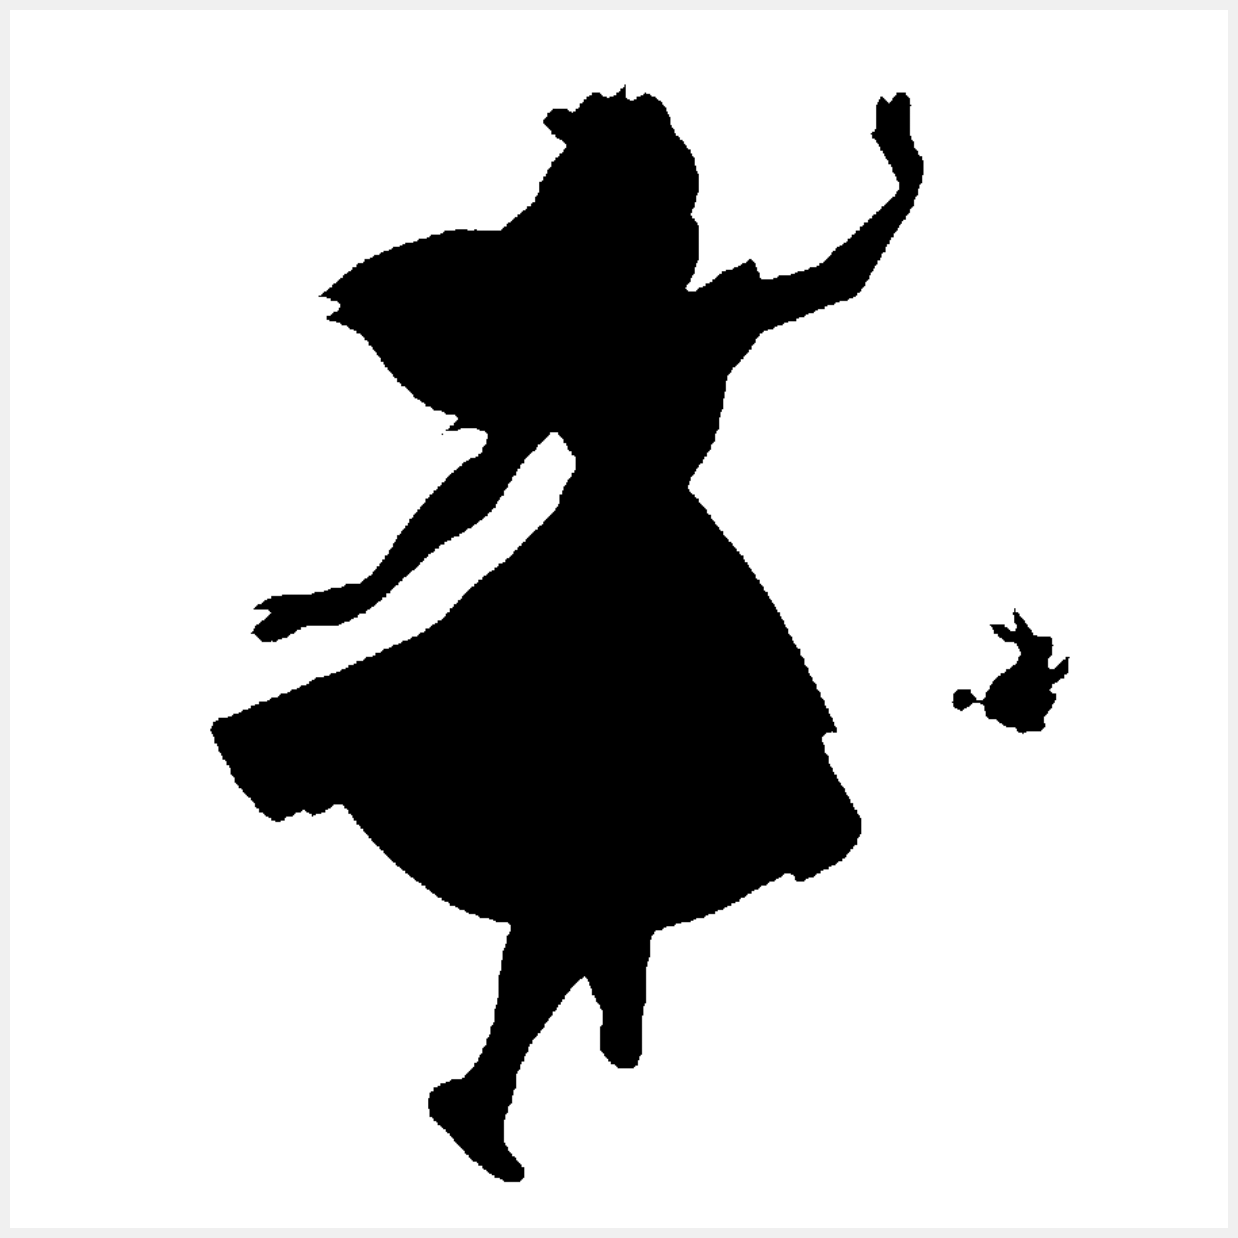

In [34]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

(-0.5, 899.5, 899.5, -0.5)

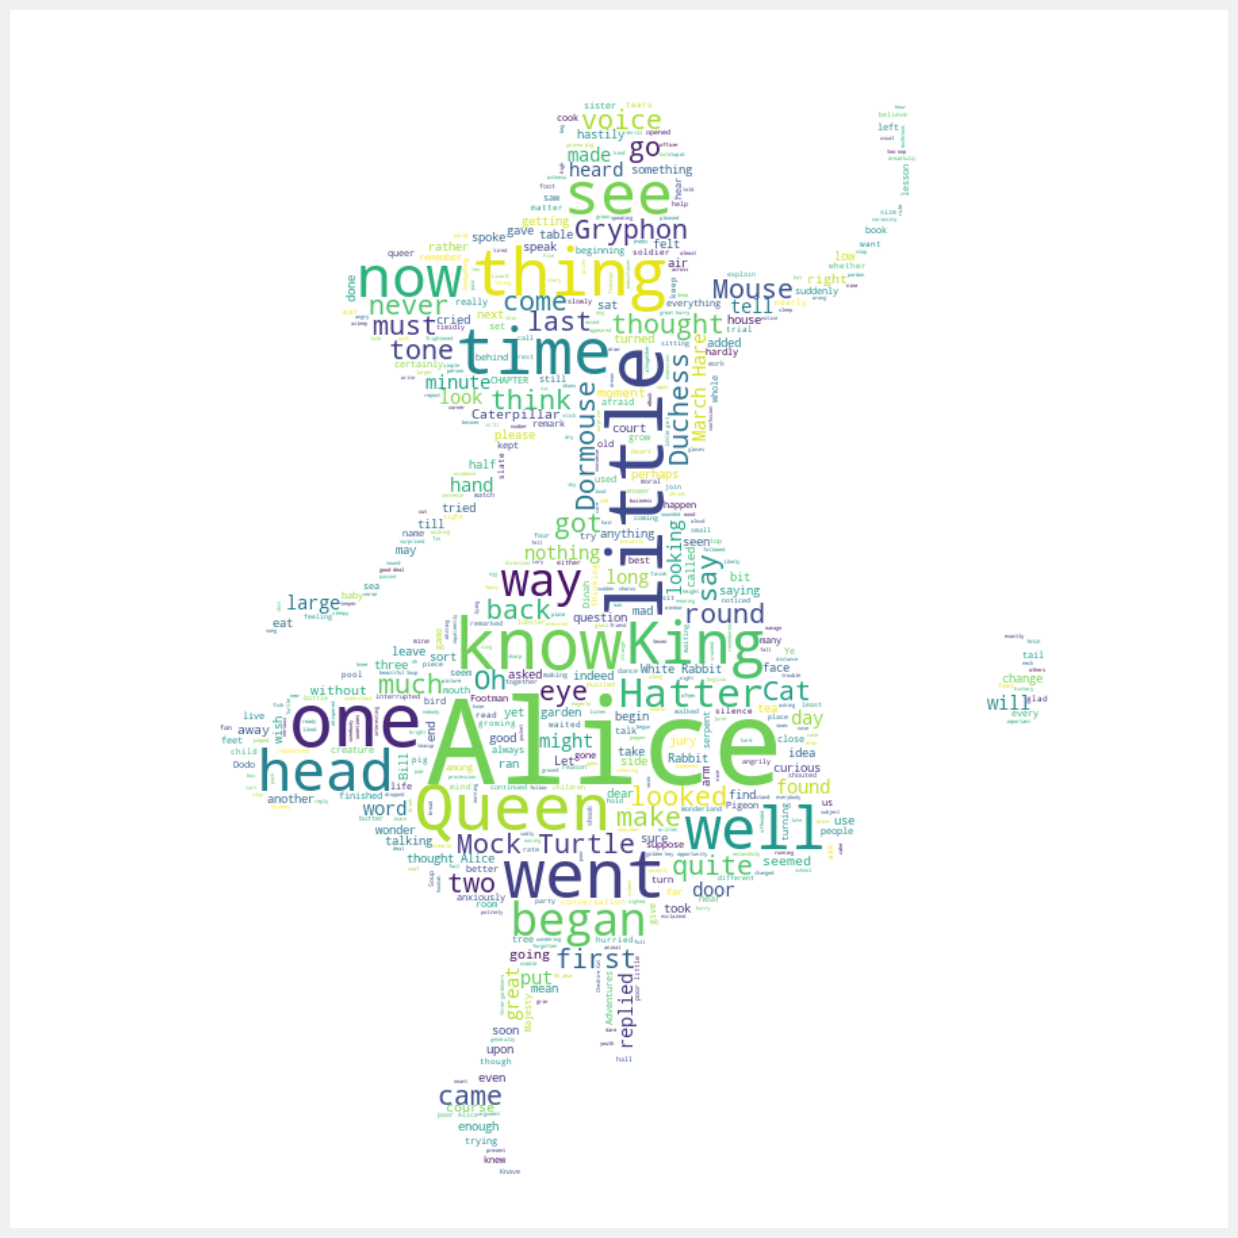

In [35]:
alice_wordcloud = WordCloud(
    background_color = 'white'
    , max_words=2000
    , stopwords=stopwords
    , mask=alice_mask
)

alice_wordcloud.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wordcloud,interpolation='bilinear')
plt.axis('off')

## Another Example

In [36]:
# Create word cloud based on how big the contribution of country for immigration

total_immigration = df_can['Total'].sum()

max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [37]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


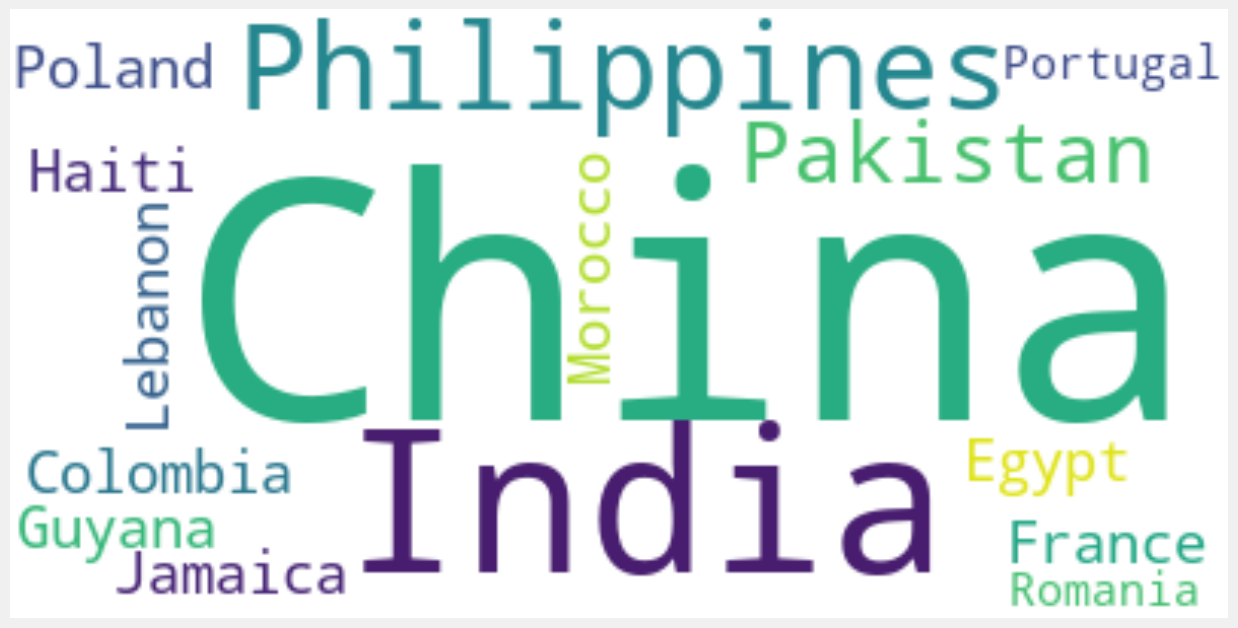

In [38]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots

In [39]:
import seaborn as sns
import pandas as pd

In [40]:
canada_immigration = pd.read_excel(
    "/Users/raraditapurnamareta/H8_004/Sesi_8/Data/Canada.xlsx"
    ,sheet_name="Canada by Citizenship"
    ,skiprows=range(20)
    ,skipfooter=2
)

In [41]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [48]:
# Create a new dataframe contains sum of immigrant in year


df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float,df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']
df_tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

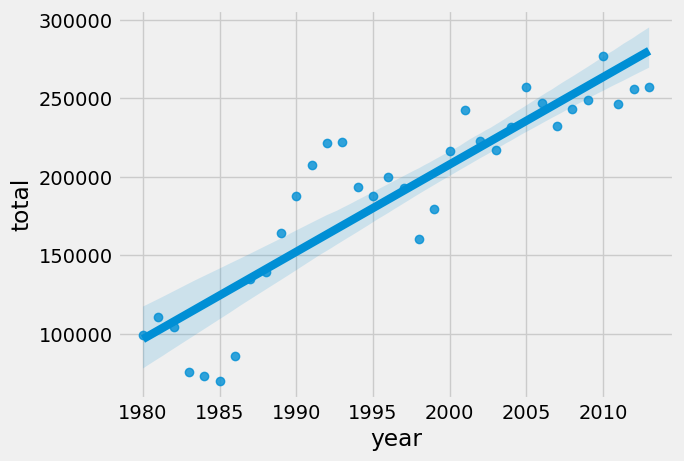

In [49]:
# regression plot

ax = sns.regplot(x='year', y='total', data=df_tot)

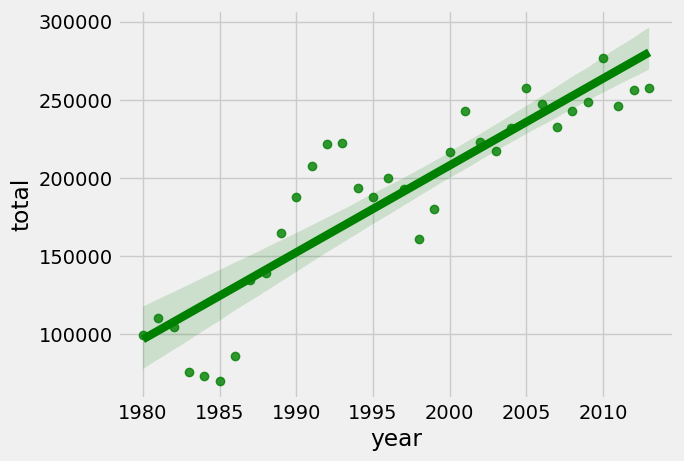

In [50]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

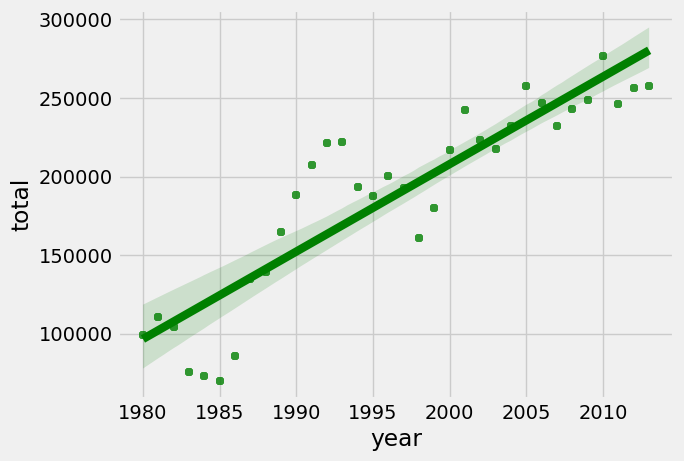

In [51]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

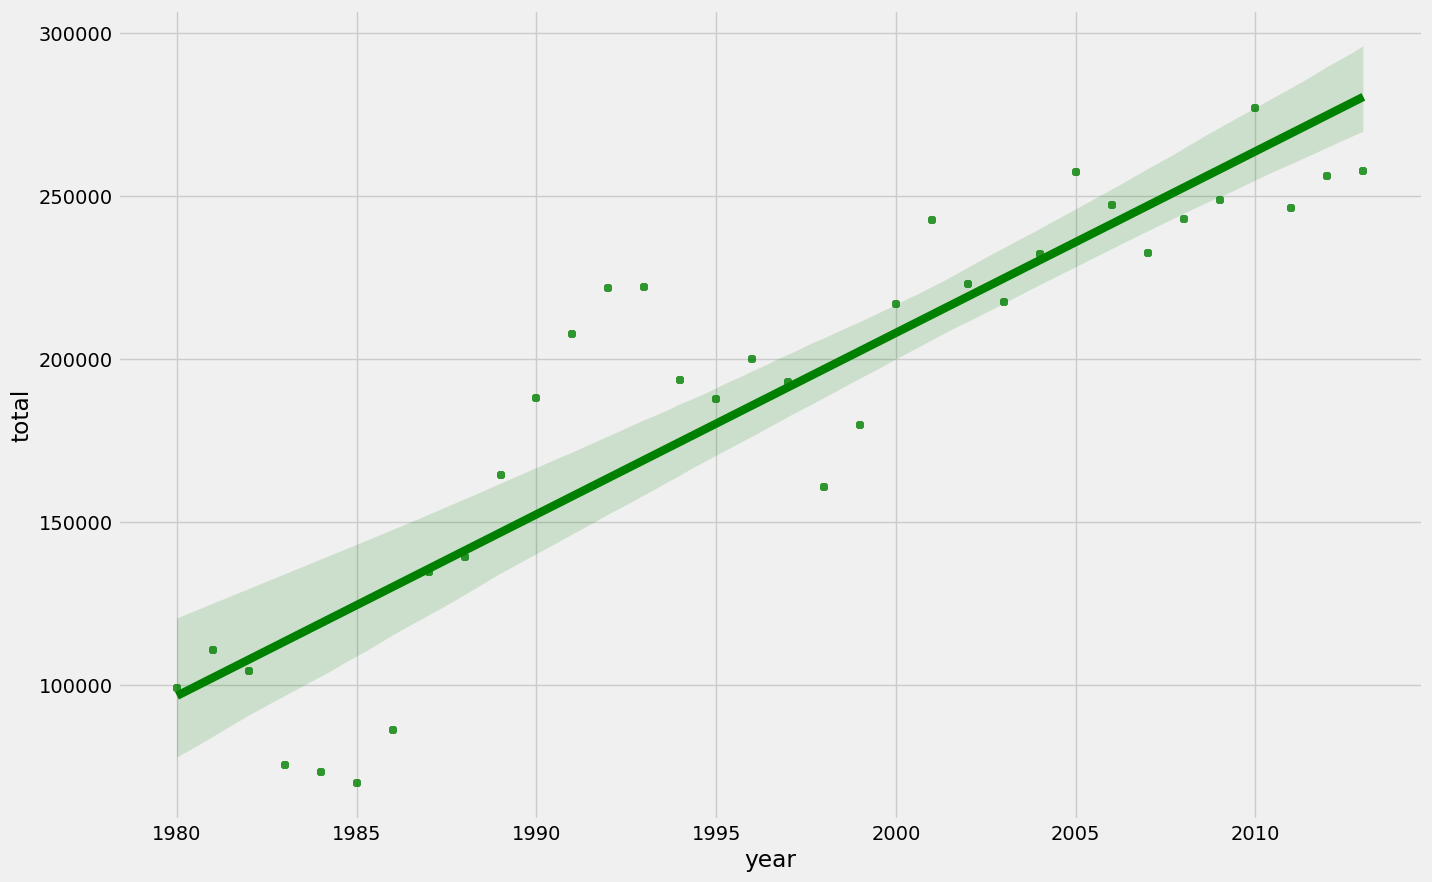

In [52]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

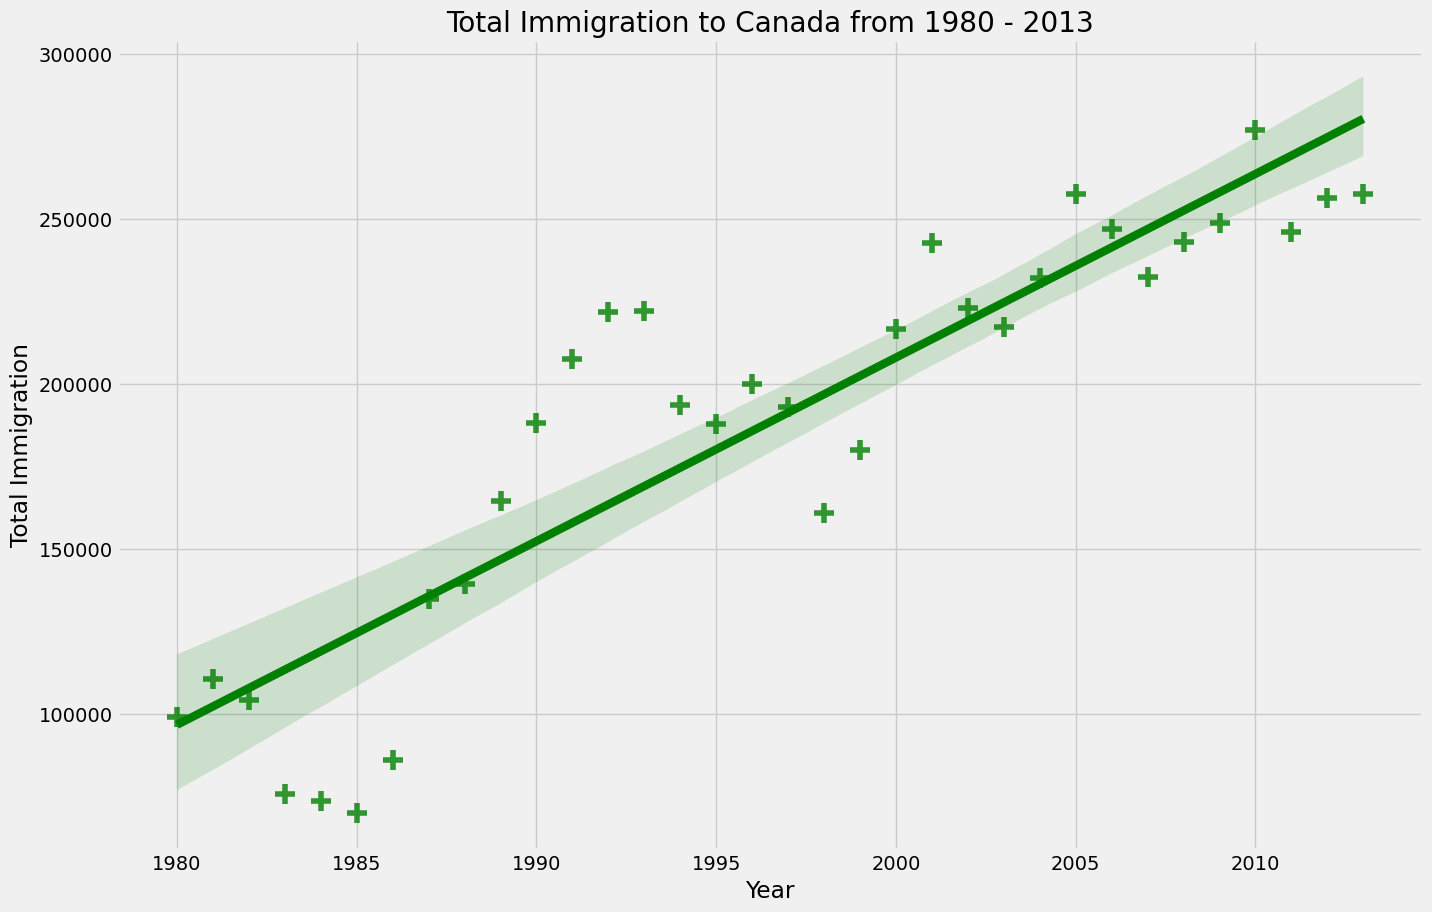

In [53]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

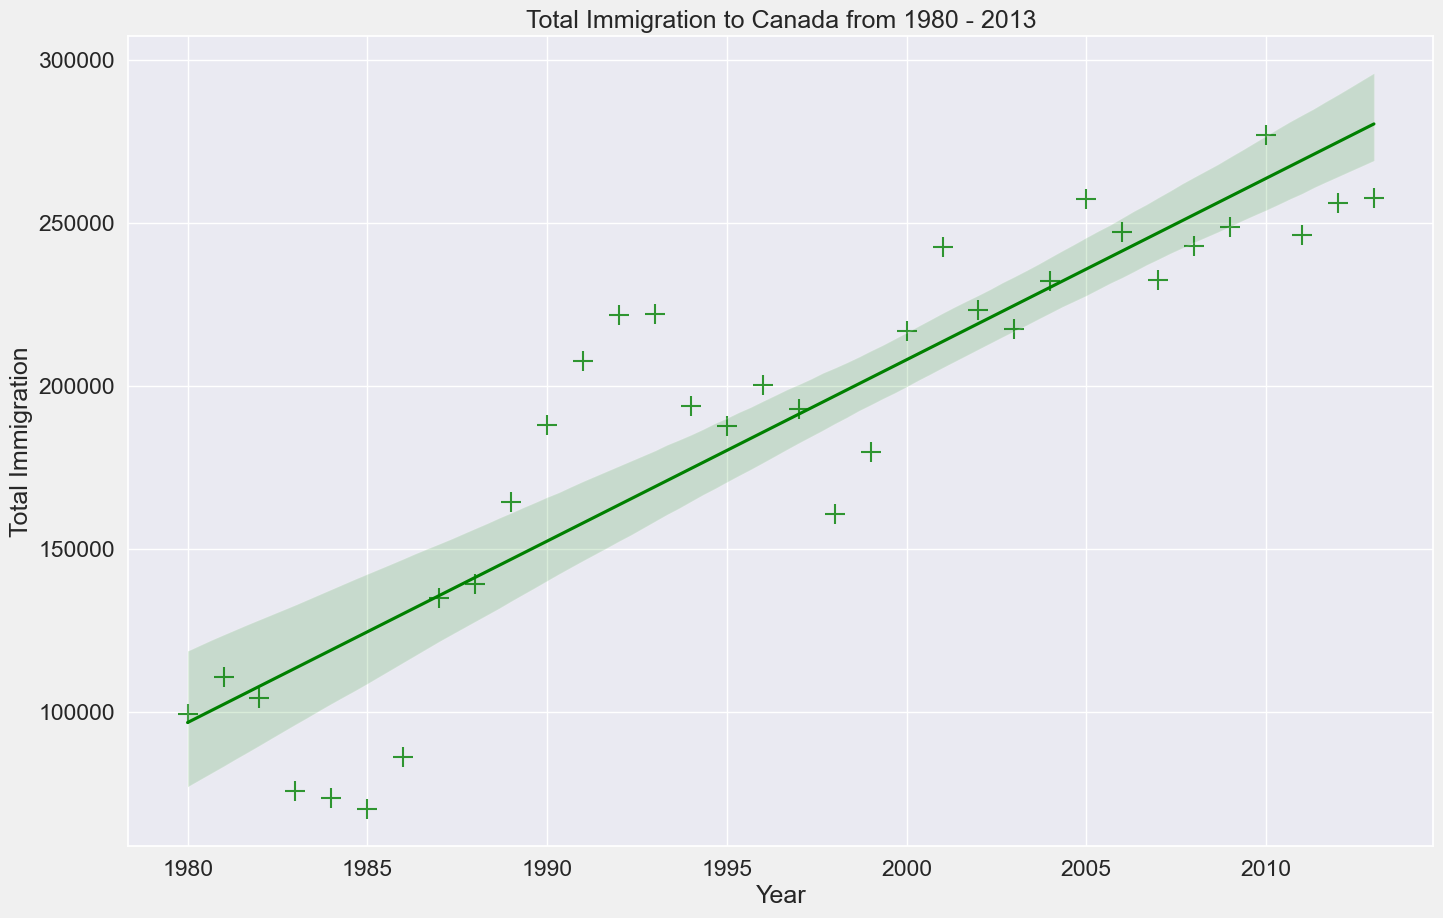

In [54]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

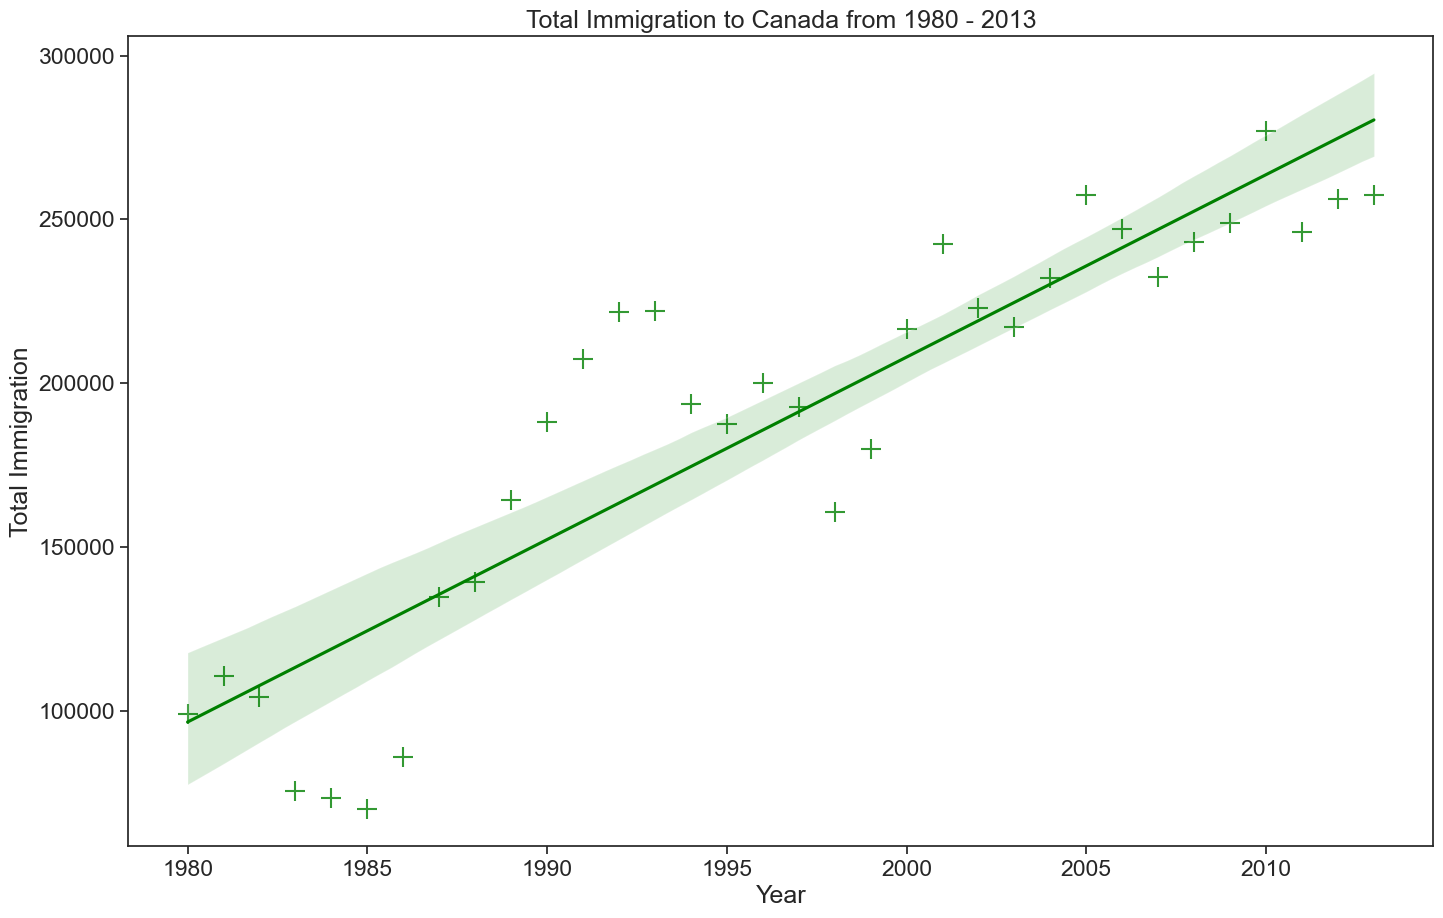

In [55]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

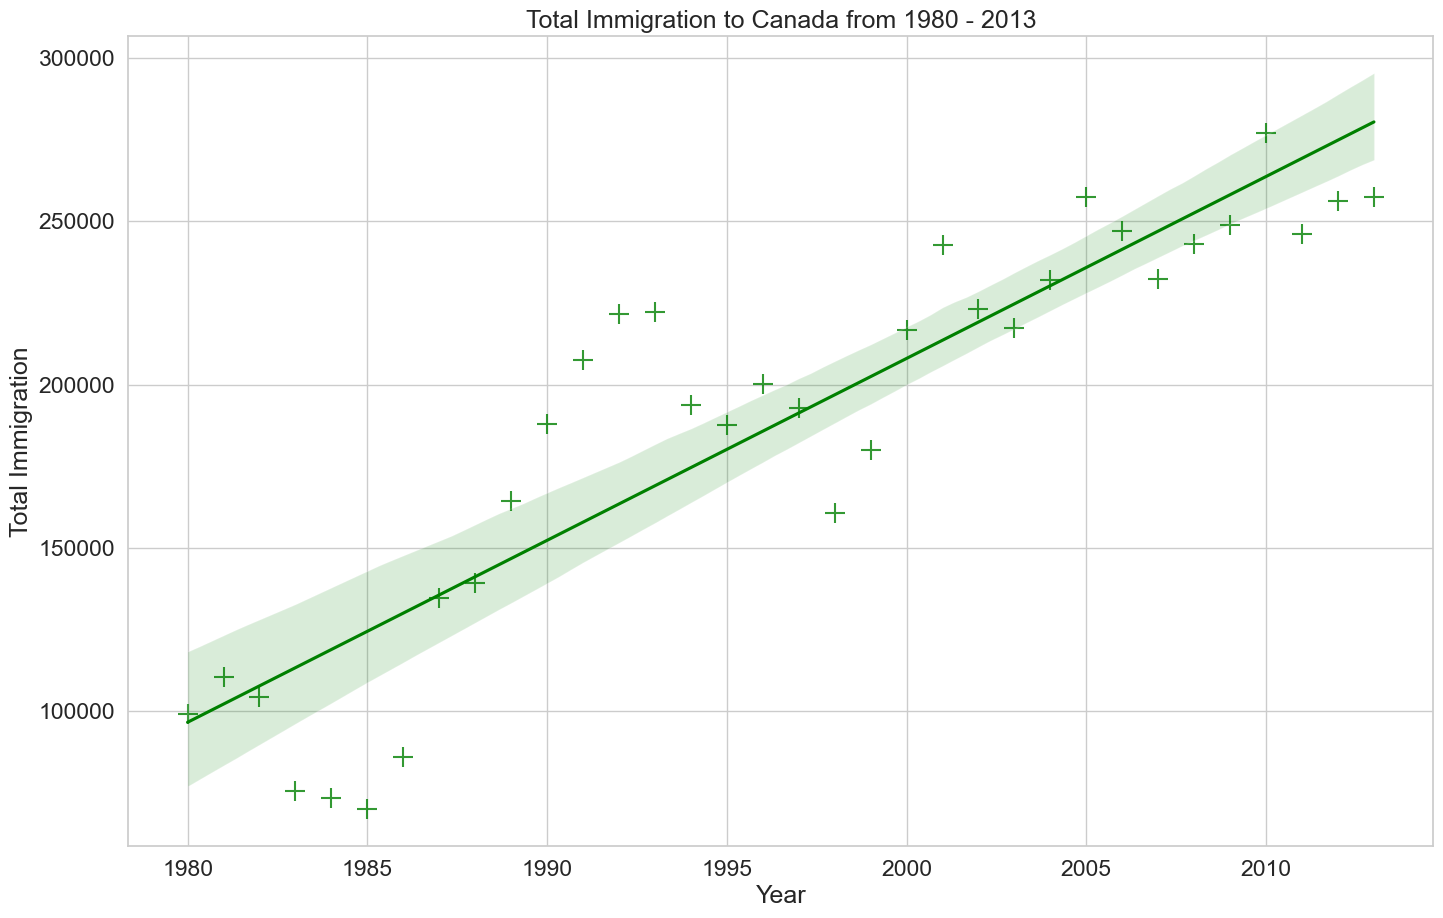

In [56]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

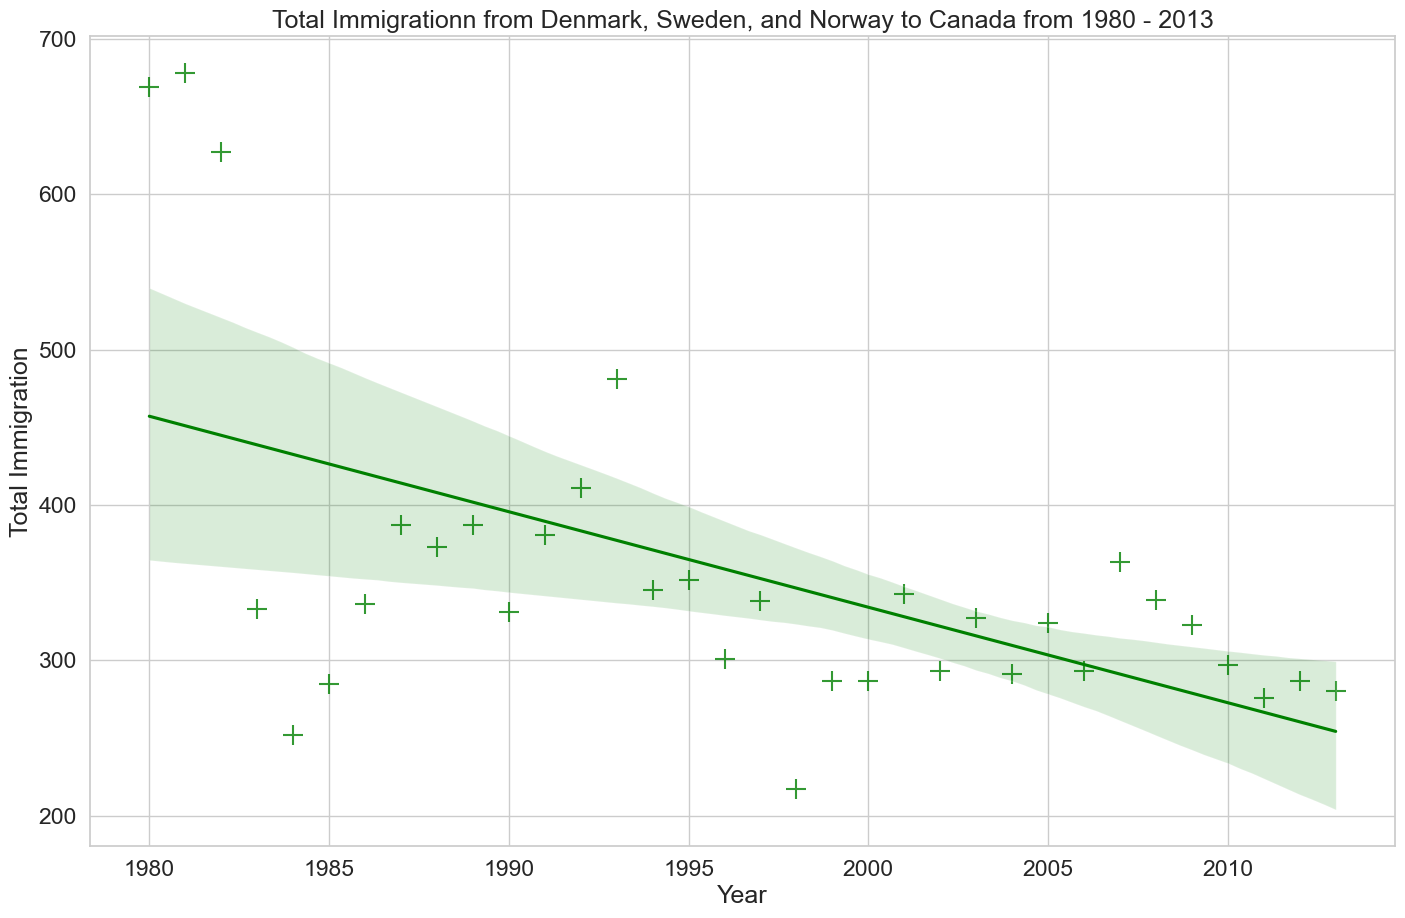

In [57]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')


### Map

In [ ]:
incidents_data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [58]:
import folium

In [59]:
world_map = folium.Map()

world_map

In [60]:
jakarta_map = folium.Map(location=[-6.1754, 106.8272], zoom_start=10)

jakarta_map

In [61]:
jakarta_map = folium.Map(location=[-6.1754, 106.8272], zoom_start=10, tiles='CartoDB positron')

jakarta_map

## Another Example

In [63]:
# create a Stamen Toner map of the world centered around Semarang

world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

world_map

In [65]:
# world map of Hacktiv8 with a zoom level of 15

world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)

world_map

#### Stamen Toner Maps

In [66]:
# create a Stamen Toner map of the world centered around Semarang

world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

world_map

In [67]:
# create a Stamen Toner map of the world centered around Semarang

world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

world_map

## Maps with Marker

In [70]:

incidents_data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [71]:
incidents_data

IncidntNum        Category  \
0        120058272     WEAPON LAWS   
1        120058272     WEAPON LAWS   
2        141059263        WARRANTS   
3        160013662    NON-CRIMINAL   
4        160002740    NON-CRIMINAL   
...            ...             ...   
150495   161061000         ASSAULT   
150496   176000742    NON-CRIMINAL   
150497   176000758   LARCENY/THEFT   
150498   176000764   LARCENY/THEFT   
150499   179002868  OTHER OFFENSES   

                                                 Descript DayOfWeek  \
0                               POSS OF PROHIBITED WEAPON    Friday   
1          FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE    Friday   
2                                          WARRANT ARREST    Monday   
3                                           LOST PROPERTY   Tuesday   
4                                           LOST PROPERTY    Friday   
...                                                   ...       ...   
150495                                            BATTERY    Friday   
150496                                      LOST PROPERTY    Friday   
150497                            PETTY THEFT OF PROPERTY  Thursday   
150498                            GRAND THEFT OF PROPERTY    Friday   
150499  FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...    Friday   

                          Date   Time  PdDistrict      Resolution  \
0       01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1       01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2       04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3       01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4       01/01/2016 12:00:00 AM  00:30     MISSION            NONE   
...                        ...    ...         ...             ...   
150495  12/30/2016 12:00:00 AM  21:01        PARK            NONE   
150496  12/30/2016 12:00:00 AM  08:00     CENTRAL            NONE   
150497  12/29/2016 12:00:00 AM  20:00     CENTRAL            NONE   
150498  12/30/2016 12:00:00 AM  10:00     CENTRAL            NONE   
150499  12/02/2016 12:00:00 AM  14:00    SOUTHERN            NONE   

                         Address           X          Y  \
0         800 Block of BRYANT ST -122.403405  37.775421   
1         800 Block of BRYANT ST -122.403405  37.775421   
2          KEITH ST / SHAFTER AV -122.388856  37.729981   
3         JONES ST / OFARRELL ST -122.412971  37.785788   
4           16TH ST / MISSION ST -122.419672  37.765050   
...                          ...         ...        ...   
150495       OAK ST / STANYAN ST -122.453982  37.771428   
150496   JACKSON ST / SANSOME ST -122.401857  37.796626   
150497       PINE ST / TAYLOR ST -122.412269  37.790673   
150498  200 Block of STOCKTON ST -122.406659  37.788275   
150499    800 Block of BRYANT ST -122.403405  37.775421   

                                     Location            PdId  
0        (37.775420706711, -122.403404791479)  12005827212120  
1        (37.775420706711, -122.403404791479)  12005827212168  
2       (37.7299809672996, -122.388856204292)  14105926363010  
3       (37.7857883766888, -122.412970537591)  16001366271000  
4       (37.7650501214668, -122.419671780296)  16000274071000  
...                                       ...             ...  
150495  (37.7714278595913, -122.453981622365)  16106100004134  
150496  (37.7966261239618, -122.401857374739)  17600074271000  
150497   (37.7906727649886, -122.41226909106)  17600075806372  
150498  (37.7882745285785, -122.406658711008)  17600076406374  
150499   (37.775420706711, -122.403404791479)  17900286809024  

[150500 rows x 13 columns]

In [72]:
limit= 100
incidents_data = incidents_data.loc[0:limit, :]

In [73]:
incidents_data.shape

(101, 13)

In [74]:
sflat = 37.77
sflong = -122.43

In [75]:
sfmap = folium.Map(location=[sflat, sflong], zoom_start=12)

sfmap

In [76]:
for i in zip(incidents_data['Y'].values,incidents_data['X'].values) :
    print(i)

(37.775420706711, -122.403404791479)
(37.775420706711, -122.403404791479)
(37.7299809672996, -122.388856204292)
(37.7857883766888, -122.412970537591)
(37.7650501214668, -122.419671780296)
(37.788018555829, -122.426077177375)
(37.7808789360214, -122.405721454567)
(37.7839805592634, -122.411778295992)
(37.7757876218293, -122.393357241451)
(37.7209669615499, -122.387181635995)
(37.7644781578695, -122.477376524003)
(37.7457389429655, -122.477960327299)
(37.7356970275482, -122.37675765553)
(37.7292705199592, -122.432325871028)
(37.791642982384, -122.40090869889)
(37.7837069301545, -122.408595110869)
(37.7572895904578, -122.406870402082)
(37.7489063051829, -122.420354780861)
(37.715765426995, -122.439909766772)
(37.7835699386918, -122.408421116922)
(37.7736186276456, -122.422315670749)
(37.7928412840447, -122.424519835009)
(37.7540986882068, -122.414233849038)
(37.7540986882068, -122.414233849038)
(37.7714939969416, -122.507750131004)
(37.718302204766, -122.474444639595)
(37.7645752317615, -

In [77]:
incidents = folium.map.FeatureGroup()


for lat, long in zip(incidents_data['Y'].values, incidents_data['X'].values):
    incidents.add_child(
        folium.CircleMarker(
            [lat,long]
            ,radius=5
            ,color='yellow'
            ,fill=True
            ,fill_color='blue'
            ,fill_opacity=.6
        )
    )


sfmap.add_child(incidents)    

In [78]:
incidents = folium.map.FeatureGroup()


for lat, long in zip(incidents_data['Y'].values, incidents_data['X'].values):
    incidents.add_child(
        folium.CircleMarker(
            [lat,long]
            ,radius=5
            ,color='yellow'
            ,fill=True
            ,fill_color='blue'
            ,fill_opacity=.6
        )
    )

# Pop-up text

latitudes = list(incidents_data['Y'].values)
longs = list(incidents_data['X'].values)
labels = list(incidents_data['Category'].values)


for lat, long, label in zip (latitudes, longs, labels):
    folium.Marker(
        [lat,long]
        ,popup=label
    ).add_to(sfmap)


sfmap.add_child(incidents)    

In [79]:
sfmap = folium.Map(location=[sflat, sflong], zoom_start=12)


for lat, long, label in zip(incidents_data['Y'].values, incidents_data['X'].values,incidents_data['Category'].values):
    folium.CircleMarker(
            [lat,long]
            ,radius=5
            ,color='yellow'
            ,fill=True
            ,fill_color='blue'
            ,fill_opacity=.6
            ,popup=label
        ).add_to(sfmap)

# Pop-up text

# latitudes = list(incidents_data['Y'].values)
# longs = list(incidents_data['X'].values)
# labels = list(incidents_data['Category'].values)


# for lat, long, label in zip (latitudes, longs, labels):
#     folium.Marker(
#         [lat,long]
#         ,popup=label
#     ).add_to(sfmap)


# sfmap.add_child(incidents)
sfmap    

In [80]:
from folium import plugins

sfmap = folium.Map(location=[sflat, sflong], zoom_start=12)


incidents = plugins.MarkerCluster().add_to(sfmap)

for lat, long, label in zip(incidents_data['Y'].values, incidents_data['X'].values,incidents_data['Category'].values):
    folium.Marker(
        location=[lat,long]
        ,icon=None
        ,popup=label
    ).add_to(incidents)

sfmap


In [81]:
canada_immigration.drop(["Type", "Coverage", "AREA", "REG","DEV"],axis=1,inplace=True)

In [82]:
canada_immigration.rename(
    columns={'OdName': "Country", 'AreaName':"Continent", 'RegName':"Region"},inplace=True
)

In [83]:
canada_immigration['Total'] = canada_immigration.sum(axis=1)

/var/folders/lv/sc7txngx7sz18x_p67l6s_hw0000gn/T/ipykernel_13818/3404531141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  canada_immigration['Total'] = canada_immigration.sum(axis=1)


In [84]:
years=range(1980,2014)

In [85]:
canada_immigration[['Country', 'Total']].isna().sum()

Country    0
Total      0
dtype: int64

In [87]:
world_geo = r'/Users/raraditapurnamareta/H8_004/Sesi_8/Data/geojson'

world_map = folium.Map(location=[0,0], zoom_start=2)



# folium.TileLayer(
#  tiles=world_geo,
#     attr='Mapbox',
#     name='Mapbox Streets',
#     overlay=True,
#     control=True
# ).add_to(world_map)


world_map.choropleth(
    geo_data=world_geo,
    data=canada_immigration,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)
# folium.Choropleth(
#     geo_data= world_geo
#     # ,tiles='https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json'
#     ,data= canada_immigration
#     ,colums=['Country', 'Total']
#     ,key_on='feature.properties.name'
#     ,fill_color='YlOrRd'
#     ,fill_opacity=0.7
#     ,line_opacity=0.2
#     ,legend_name="Immigration to Canada"
# ).add_to(world_map)

world_map